In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cab Fare Prediction Model

This project is intended to create a prediciton model on a cab fare dataset that would output a predicted fare price.
The original dataset is from Kaggle and can be found at this URL: https://www.kaggle.com/datasets/diishasiing/revenue-for-cab-drivers

**Columns descriptions (credit to original Kaggle dataset description):**
**VendorID**: A unique identifier for the taxi vendor or service provider.
**tpep_pickup_datetime**: The date and time when the passenger was picked up.
**tpep_dropoff_datetime**: The date and time when the passenger was dropped off.
**passenger_count**: The number of passengers in the taxi.
**trip_distance**: The total distance of the trip in miles or kilometers.
**RatecodeID**: The rate code assigned to the trip, representing fare types.
**store_and_fwd_flag**: Indicates whether the trip data was stored locally and then forwarded later (Y/N).
**PULocationID**: The unique identifier for the pickup location (zone or area).
**DOLocationID**: The unique identifier for the drop-off location (zone or area).
**payment_type**: The method of payment used by the passenger (e.g., cash, card).
**fare_amount**: The base fare for the trip.
**extra**: Additional charges applied during the trip (e.g., night surcharge).
**mta_tax**: The tax imposed by the Metropolitan Transportation Authority.
**tip_amount**: The tip given to the driver, if applicable.
**tolls_amount**: The total amount of tolls charged during the trip.
**improvement_surcharge**: A surcharge imposed for the improvement of services.
**total_amount**: The total fare amount, including all charges and surcharges.
**congestion_surcharge**: An additional charge for trips taken during high traffic congestion times

In [5]:
#Read in one of the dataset files- chosen file is January 2020
data = pd.read_csv(r'C:\Users\dorot\OneDrive\Documents\Grad School\BU\Build Project- Cab Fare Prediction\yellow_tripdata_2020-01.csv')
data.head()

C:\Users\dorot\AppData\Local\Temp\ipykernel_30608\2180434067.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\dorot\OneDrive\Documents\Grad School\BU\Build Project- Cab Fare Prediction\yellow_tripdata_2020-01.csv')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [7]:
#View current data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [9]:
rows = data.shape[0]
cols = data.shape[1]
print('The shape of the dataset is:')
print(f"Rows: {rows:,}")
print(f"Columns: {cols}")

The shape of the dataset is:
Rows: 6,405,008
Columns: 18


In [11]:
#Want to view how many rows have NA values for each column
data.isna().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [19]:
#There are no NA values for fare amount, however there are for Vendor ID, passenger count, Ratecode ID, store and fwd flag, and payment type. 
#It may be worth looking at the correlation between these columns and fare amount to see if it's ok removing them entirely or if a different data cleaning method is preferred. 
d1 = data.dropna(subset=['passenger_count'])
rows = d1.shape[0]
cols = data.shape[1]
print('The new shape of the dataset is:')
print(f"Rows: {rows:,}")
print(f"Columns: {cols}")
print(f'You removed {len(data) - len(d1):,} rows')

The new shape of the dataset is:
Rows: 6,339,567
Columns: 18
You removed 65,441 rows


In [19]:
#Want to see how many rows are duplicates
d1.duplicated().sum()

0

In [21]:
#Because of the warning when loading the data, want to assign data types to the dataset now that we have dropped NA values
dtypes = {'VendorID':'int',
          'tpep_pickup_datetime':'datetime64[ns]',
          'tpep_dropoff_datetime':'datetime64[ns]',
          'passenger_count':'int',
          'trip_distance':'float',
          'RatecodeID':'int',
          'store_and_fwd_flag':'str',
          'PULocationID':'int',
          'DOLocationID':'int',
          'payment_type':'float',
          'fare_amount':'float',
          'extra': 'float',
          'mta_tax':'float',
          'tip_amount':'float',
          'tolls_amount':'float',
          'improvement_surcharge':'float',
          'total_amount':'float',
          'congestion_surcharge':'float'}
d1 = d1.astype(dtypes)
d1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.00,1,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2,2020-01-31 23:38:07,2020-01-31 23:52:21,1,2.10,1,N,163,246,1.0,11.0,0.5,0.5,2.96,0.0,0.3,17.76,2.5
6339563,2,2020-01-31 23:00:18,2020-01-31 23:19:18,1,2.13,1,N,164,79,1.0,13.0,0.5,0.5,3.36,0.0,0.3,20.16,2.5
6339564,2,2020-01-31 23:24:22,2020-01-31 23:40:39,1,2.55,1,N,79,68,1.0,12.5,0.5,0.5,3.26,0.0,0.3,19.56,2.5
6339565,2,2020-01-31 23:44:22,2020-01-31 23:54:00,1,1.61,1,N,100,142,2.0,8.5,0.5,0.5,0.00,0.0,0.3,12.30,2.5


In [27]:
#It would be helpful to split out the pickup and dropoff information into date and time since both columns could have an effect on prediction
#Weekday values are based on Monday start (Monday = 0)
d1['pickup_date'] = d1['tpep_pickup_datetime'].dt.date
d1['pickup_time'] = d1['tpep_pickup_datetime'].dt.time
d1['pickup_hour'] = d1['tpep_pickup_datetime'].dt.hour
d1['pickup_minute'] = d1['tpep_pickup_datetime'].dt.minute
d1['pickup_weekday'] = d1['tpep_pickup_datetime'].dt.weekday
d1['dropoff_date'] = d1['tpep_dropoff_datetime'].dt.date
d1['dropoff_time'] = d1['tpep_dropoff_datetime'].dt.time
d1['dropoff_hour'] = d1['tpep_dropoff_datetime'].dt.hour
d1['dropoff_minute'] = d1['tpep_dropoff_datetime'].dt.minute
d1['dropoff_weekday'] = d1['tpep_dropoff_datetime'].dt.weekday
d1

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_date,pickup_time,pickup_hour,pickup_minute,dropoff_date,dropoff_time,dropoff_hour,dropoff_minute,pickup_weekday,dropoff_weekday
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1,N,238,239,1.0,...,2020-01-01,00:28:15,0,28,2020-01-01,00:33:03,0,33,2,2
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1,N,239,238,1.0,...,2020-01-01,00:35:39,0,35,2020-01-01,00:43:04,0,43,2,2
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1,N,238,238,1.0,...,2020-01-01,00:47:41,0,47,2020-01-01,00:53:52,0,53,2,2
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1,N,238,151,1.0,...,2020-01-01,00:55:23,0,55,2020-01-01,01:00:14,1,0,2,2
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.00,1,N,193,193,2.0,...,2020-01-01,00:01:58,0,1,2020-01-01,00:04:16,0,4,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339562,2,2020-01-31 23:38:07,2020-01-31 23:52:21,1,2.10,1,N,163,246,1.0,...,2020-01-31,23:38:07,23,38,2020-01-31,23:52:21,23,52,4,4
6339563,2,2020-01-31 23:00:18,2020-01-31 23:19:18,1,2.13,1,N,164,79,1.0,...,2020-01-31,23:00:18,23,0,2020-01-31,23:19:18,23,19,4,4
6339564,2,2020-01-31 23:24:22,2020-01-31 23:40:39,1,2.55,1,N,79,68,1.0,...,2020-01-31,23:24:22,23,24,2020-01-31,23:40:39,23,40,4,4
6339565,2,2020-01-31 23:44:22,2020-01-31 23:54:00,1,1.61,1,N,100,142,2.0,...,2020-01-31,23:44:22,23,44,2020-01-31,23:54:00,23,54,4,4


In [29]:
d1.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6339567,6339567,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06
mean,1.669624e+00,2020-01-17 03:34:30.005863424,2020-01-17 03:50:19.465307904,1.515333e+00,2.848626e+00,1.059908e+00,1.650263e+02,1.629923e+02,1.270298e+00,1.249486e+01,1.098011e+00,4.938029e-01,2.211245e+00,3.350126e-01,2.979684e-01,1.847162e+01,2.299052e+00
min,1.000000e+00,2003-01-01 00:07:17,2003-01-01 14:16:59,0.000000e+00,-2.218000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,2020-01-09 17:41:14,2020-01-09 17:57:08,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,2020-01-17 00:19:20,2020-01-17 00:35:33,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00
75%,2.000000e+00,2020-01-24 18:40:29,2020-01-24 18:55:51,2.000000e+00,2.900000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.956000e+01,2.500000e+00
max,2.000000e+00,2021-01-02 01:12:10,2021-01-02 01:25:01,9.000000e+00,2.628800e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00
std,4.703484e-01,NaN,NaN,1.151594e+00,3.757127e+00,8.118432e-01,6.538737e+01,6.978119e+01,4.739985e-01,1.195665e+01,1.251903e+00,6.878918e-02,2.764287e+00,1.745776e+00,3.401817e-02,1.463892e+01,7.017109e-01


In [43]:
#There are a number of fare values that are negative. I want to know how many rows this affects, including rows that have a total amount of 0
neg = data[data['total_amount'] < 0]
zero = data[data['total_amount'] == 0]
print(f'There are {len(neg):,} rows that have a negative total amount')
print(f'There are {len(zero):,} rows that have a total amount of 0')
print(f'This represents {round(((len(neg) + len(zero)) / len(data)) * 100,2):,}% of the total')

There are 19,505 rows that have a negative total amount
There are 1,672 rows that have a total amount of 0
This represents 0.33% of the total


In [31]:
#Rather than dropping the rows with a negative amount, I'm getting the absolute value assuming they are all fine otherwise it's just a fluke
#I could do a little more analysis here to make sure they are valid

d1[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']] = d1[['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']].abs()
d1.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6339567,6339567,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06,6.339567e+06
mean,1.669624e+00,2020-01-17 03:34:30.005863424,2020-01-17 03:50:19.465307904,1.515333e+00,2.848626e+00,1.059908e+00,1.650263e+02,1.629923e+02,1.270298e+00,1.257066e+01,1.100252e+00,4.968018e-01,2.211424e+00,3.358876e-01,2.998080e-01,1.856747e+01,2.311218e+00
min,1.000000e+00,2003-01-01 00:07:17,2003-01-01 14:16:59,0.000000e+00,-2.218000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2020-01-09 17:41:14,2020-01-09 17:57:08,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,2020-01-17 00:19:20,2020-01-17 00:35:33,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00
75%,2.000000e+00,2020-01-24 18:40:29,2020-01-24 18:55:51,2.000000e+00,2.900000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.956000e+01,2.500000e+00
max,2.000000e+00,2021-01-02 01:12:10,2021-01-02 01:25:01,9.000000e+00,2.628800e+02,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00
std,4.703484e-01,NaN,NaN,1.151594e+00,3.757127e+00,8.118432e-01,6.538737e+01,6.978119e+01,4.739985e-01,1.187693e+01,1.249934e+00,4.196646e-02,2.764143e+00,1.745608e+00,7.587671e-03,1.451716e+01,6.605378e-01


In [45]:
#Getting a new subset that removes rows where the total amount is 0 and where the trip distance is more than 0

d2 = d1[(d1['total_amount'] > 0) & (d1['trip_distance'] > 0)]
d2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_date,pickup_time,pickup_hour,pickup_minute,dropoff_date,dropoff_time,dropoff_hour,dropoff_minute,pickup_weekday,dropoff_weekday
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.20,1,N,238,239,1.0,...,2020-01-01,00:28:15,0,28,2020-01-01,00:33:03,0,33,2,2
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.20,1,N,239,238,1.0,...,2020-01-01,00:35:39,0,35,2020-01-01,00:43:04,0,43,2,2
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.60,1,N,238,238,1.0,...,2020-01-01,00:47:41,0,47,2020-01-01,00:53:52,0,53,2,2
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.80,1,N,238,151,1.0,...,2020-01-01,00:55:23,0,55,2020-01-01,01:00:14,1,0,2,2
5,2,2020-01-01 00:09:44,2020-01-01 00:10:37,1,0.03,1,N,7,193,2.0,...,2020-01-01,00:09:44,0,9,2020-01-01,00:10:37,0,10,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339561,2,2020-01-31 23:00:01,2020-01-31 23:21:31,1,4.11,1,N,48,75,1.0,...,2020-01-31,23:00:01,23,0,2020-01-31,23:21:31,23,21,4,4
6339562,2,2020-01-31 23:38:07,2020-01-31 23:52:21,1,2.10,1,N,163,246,1.0,...,2020-01-31,23:38:07,23,38,2020-01-31,23:52:21,23,52,4,4
6339563,2,2020-01-31 23:00:18,2020-01-31 23:19:18,1,2.13,1,N,164,79,1.0,...,2020-01-31,23:00:18,23,0,2020-01-31,23:19:18,23,19,4,4
6339564,2,2020-01-31 23:24:22,2020-01-31 23:40:39,1,2.55,1,N,79,68,1.0,...,2020-01-31,23:24:22,23,24,2020-01-31,23:40:39,23,40,4,4


In [53]:
print(f'% of original rows remaining {round((len(d2) / len(data)) * 100,2)}%')

% of original rows remaining 97.65%


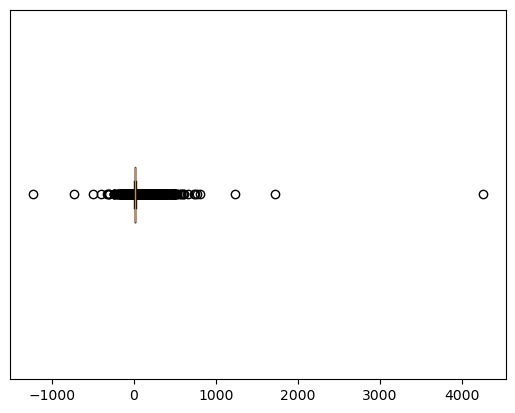

In [61]:
plt.boxplot(data['fare_amount'], vert=False)
plt.yticks([])
plt.show()

In [85]:
faremin = data['fare_amount'].min()
faremax = data['fare_amount'].max()
print(f'Fare min = {faremin}')
print(f'Fare max = {faremax}')

Fare min = -1238.0
Fare max = 4265.0


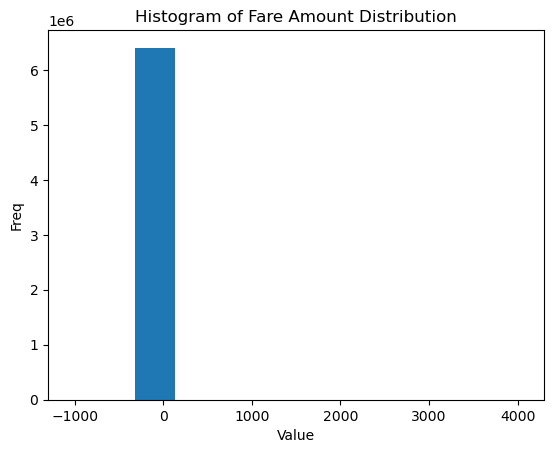

In [87]:
plt.hist(data['fare_amount'], bins=12)
plt.xlim(-1300,4300)
plt.xlabel('Value')
plt.ylabel('Freq')
plt.title('Histogram of Fare Amount Distribution')
plt.show()